## CDAPⅠ-Certified-Data-Analyst-using-Python-3 

#### 1. 3_data.txt데이터를 불러와, 데이터 프레임으로 선언하시오.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("3_data.txt", sep='\t')

In [3]:
df.head(5)

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20180401,110,515,21,F,55,4,22
1,20180401,110,515,21,M,20,35,184
2,20180401,110,515,21,M,25,70,425
3,20180401,110,515,21,M,30,18,82
4,20180401,110,515,21,M,35,4,44


#### 2. 위에서 선언한 데이터 프레임에 아래의 리스트를 새로운 Column name으로 선언하시오.

In [4]:
name_col = ['기준일자','주소-구','행정동','업종','성별','나이','이용건수','이용금액'] 

In [5]:
df = pd.read_csv('3_data.txt',sep='\t',names=name_col,skiprows=[0])

In [6]:
df.head()

,기준일자,주소-구,행정동,업종,성별,나이,이용건수,이용금액
0,20180401,110,515,21,F,55,4,22
1,20180401,110,515,21,M,20,35,184
2,20180401,110,515,21,M,25,70,425
3,20180401,110,515,21,M,30,18,82
4,20180401,110,515,21,M,35,4,44


#### 3. describe() 함수를 활용해 요약 통계량을 계산하시오.

In [7]:
df.describe()

,기준일자,주소-구,행정동,업종,나이,이용건수,이용금액
count,1.998575e+06,1.998575e+06,1.998575e+06,1.998575e+06,1.998575e+06,1.998575e+06,1.998575e+06
mean,2.018311e+07,2.411768e+02,6.224481e+02,5.826584e+01,4.176893e+01,1.231388e+02,2.855184e+03
std,4.041929e+03,1.194784e+02,5.192602e+01,2.065741e+01,1.394272e+01,3.678319e+02,1.336730e+04
min,2.018040e+07,1.100000e+02,5.150000e+02,2.100000e+01,2.000000e+01,4.000000e+00,2.000000e+00
25%,2.018063e+07,1.100000e+02,5.950000e+02,4.000000e+01,3.000000e+01,9.000000e+00,1.310000e+02
50%,2.018093e+07,3.500000e+02,6.240000e+02,6.200000e+01,4.000000e+01,2.300000e+01,4.790000e+02
75%,2.018123e+07,3.500000e+02,6.650000e+02,8.000000e+01,5.500000e+01,9.200000e+01,1.723000e+03
max,2.019033e+07,3.500000e+02,7.200000e+02,9.200000e+01,6.500000e+01,2.081400e+04,5.242923e+06


#### 4. 아래 함수를 적용하여, 업종을 라벨링 하시오.

In [8]:
def div_func(data):
    if data==70:
        return '의료기관'
    elif data == 71 :
        return '보건위생'
    elif data== 21 :
        return '레저업소'
    elif data == 22:
        return '문화취미'
    elif data== 50 :
        return '서적문구'
    elif data ==42:
        return '의복'
    elif data ==33:
        return '연료판매'
    elif data == 62:
        return '자동차정비'
    elif data == 92:
        return '수리서비스'
    elif data == 44:
        return '잡화'
    elif data==40:
        return '유통업'
    elif data ==80:
        return '요식업소'
    elif data ==81:
        return '음료식품'
    else:
        return '기타'

In [9]:
df['업종']=df['업종'].apply(div_func)

In [10]:
df.head()

,기준일자,주소-구,행정동,업종,성별,나이,이용건수,이용금액
0,20180401,110,515,레저업소,F,55,4,22
1,20180401,110,515,레저업소,M,20,35,184
2,20180401,110,515,레저업소,M,25,70,425
3,20180401,110,515,레저업소,M,30,18,82
4,20180401,110,515,레저업소,M,35,4,44


#### 5. 구매금액의 단위를 맞춰 변환하시오. (현재 파일 단위 : 천원)

In [11]:
df['이용금액'] = df['이용금액'] * 1000
df.head(5)

,기준일자,주소-구,행정동,업종,성별,나이,이용건수,이용금액
0,20180401,110,515,레저업소,F,55,4,22000
1,20180401,110,515,레저업소,M,20,35,184000
2,20180401,110,515,레저업소,M,25,70,425000
3,20180401,110,515,레저업소,M,30,18,82000
4,20180401,110,515,레저업소,M,35,4,44000


#### 6. 업종별로 구매금액의 총합과 빈도수(count)를 계산하여 엑셀파일형태로 저장하시오.

In [12]:
df2 = pd.DataFrame()
df2['이용금액총합'] = df.groupby('업종').이용금액.sum()
df2['이용빈도수'] = df.groupby('업종').이용건수.count()

In [13]:
df2

,이용금액총합,이용빈도수
업종,,
기타,123242235000,104536
레저업소,20060667000,86955
문화취미,34906291000,84716
보건위생,159856883000,191557
서적문구,281519383000,135048
수리서비스,11270218000,64868
연료판매,315654553000,81204
요식업소,1696611691000,260696
유통업,1556161967000,262564


In [14]:
df2.to_csv('업종별이용통계.csv', index=True, encoding='ms949')

#### 7. 기준일자를 datetime 형태로 변환하시오

In [15]:
from datetime import datetime

df['기준일자'] = pd.to_datetime(df['기준일자'], format = '%Y%m%d').dt.strftime("%Y-%m-%d")

In [16]:
df["기준일자"] = df["기준일자"].astype('datetime64[ns]')

#### 8. 변환된 기준일자를 이용하여, 연도, 월 , 요일, 주차, 일자를 계산해, 새로운 Column으로 선언하시오

In [17]:
df['연도'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month
df['요일'] = df['기준일자'].dt.weekday
df['요일명'] = df['기준일자'].dt.weekday_name
df['주차'] = df['기준일자'].dt.week
df['일자'] = df['기준일자'].dt.day

In [18]:
df.head(5)

,기준일자,주소-구,행정동,업종,성별,나이,이용건수,이용금액,연도,월,요일,요일명,주차,일자
0,2018-04-01,110,515,레저업소,F,55,4,22000,2018,4,6,Sunday,13,1
1,2018-04-01,110,515,레저업소,M,20,35,184000,2018,4,6,Sunday,13,1
2,2018-04-01,110,515,레저업소,M,25,70,425000,2018,4,6,Sunday,13,1
3,2018-04-01,110,515,레저업소,M,30,18,82000,2018,4,6,Sunday,13,1
4,2018-04-01,110,515,레저업소,M,35,4,44000,2018,4,6,Sunday,13,1


#### 9. 각 월별, 요일별 이용금액의 합을 계산하여, 엑셀파일형태로 저장하시오.

In [19]:
df6 = pd.DataFrame()
df6 = df[['월','요일','요일명', '이용금액']]

In [20]:
df6

,월,요일,요일명,이용금액
0,4,6,Sunday,22000
1,4,6,Sunday,184000
2,4,6,Sunday,425000
3,4,6,Sunday,82000
4,4,6,Sunday,44000
...,...,...,...,...
1998570,3,6,Sunday,16000
1998571,3,6,Sunday,259000
1998572,3,6,Sunday,80000
1998573,3,6,Sunday,69000


In [21]:
t = df6.groupby(['월','요일','요일명'])['이용금액'].sum()
df6 = t.to_frame()
df6.sort_values(by=['월','요일'], axis=0, inplace=True)

In [22]:
df6.head(20)

이용금액
월 요일 요일명                   
1 0  Monday     67405140000
  1  Tuesday    75931805000
  2  Wednesday  79946569000
  3  Thursday   99278717000
  4  Friday     68048485000
  5  Saturday   68658863000
  6  Sunday     46632847000
2 0  Monday     64532130000
  1  Tuesday    52307351000
  2  Wednesday  67270376000
  3  Thursday   79050622000
  4  Friday     68039502000
  5  Saturday   68960442000
  6  Sunday     46033456000
3 0  Monday     71026189000
  1  Tuesday    63039942000
  2  Wednesday  68864818000
  3  Thursday   63093405000
  4  Friday     84789942000
  5  Saturday   88797015000

In [23]:
df6.to_csv('월별요일별이용금액합.csv', index=True, encoding='ms949')

#### 10. 업종 중, '의복'의 Column만 추출하여, 성별에 따른 이용금액의 합을 계산해, 엑셀파일 형태로 저장하시오.

In [24]:
df3 = pd.DataFrame()
df3 = df[df['업종']=='의복']

In [25]:
s = df3.groupby(['업종', '성별'])['이용금액'].sum()
df3 = s.to_frame()

In [26]:
df3.to_csv('의복성별이용금액.csv', index=True, encoding='ms949')
df3

이용금액
업종 성별             
의복 F   73333685000
   M   32937618000

#### 11. '주소-구' Column의 값을 아래를 참조하여 변환하시오.

* 종로구 : 110 
* 노원구 : 350 

In [27]:
import numpy as np

df['주소-구'] = np.where(df['주소-구']==110, '종로구', '노원구')

In [28]:
df.head(5)

,기준일자,주소-구,행정동,업종,성별,나이,이용건수,이용금액,연도,월,요일,요일명,주차,일자
0,2018-04-01,종로구,515,레저업소,F,55,4,22000,2018,4,6,Sunday,13,1
1,2018-04-01,종로구,515,레저업소,M,20,35,184000,2018,4,6,Sunday,13,1
2,2018-04-01,종로구,515,레저업소,M,25,70,425000,2018,4,6,Sunday,13,1
3,2018-04-01,종로구,515,레저업소,M,30,18,82000,2018,4,6,Sunday,13,1
4,2018-04-01,종로구,515,레저업소,M,35,4,44000,2018,4,6,Sunday,13,1


#### 12. 이용금액에 이용건수를 나눠, 건당 이용 금액을 계산하시오

In [29]:
df['건당이용금액'] = df['이용금액'] / df['이용건수']

pd.options.display.float_format = '{:.2f}'.format  # 소수 둘째자리까지 표시
df.head(5)

,기준일자,주소-구,행정동,업종,성별,나이,이용건수,이용금액,연도,월,요일,요일명,주차,일자,건당이용금액
0,2018-04-01,종로구,515,레저업소,F,55,4,22000,2018,4,6,Sunday,13,1,5500.00
1,2018-04-01,종로구,515,레저업소,M,20,35,184000,2018,4,6,Sunday,13,1,5257.14
2,2018-04-01,종로구,515,레저업소,M,25,70,425000,2018,4,6,Sunday,13,1,6071.43
3,2018-04-01,종로구,515,레저업소,M,30,18,82000,2018,4,6,Sunday,13,1,4555.56
4,2018-04-01,종로구,515,레저업소,M,35,4,44000,2018,4,6,Sunday,13,1,11000.00


#### 13. 종로구의 업종별 건당이용금액의 합을 계산하여, 가장 높은 건당 이용금액의 업종을 파악하시오.

종로구의 가장 높은 건당이용금액의 업종은 의료기관이다.

In [30]:
df4 = pd.DataFrame()
df4 = df[df['주소-구']=='종로구']
g = df4.groupby(['주소-구', '업종'])['건당이용금액'].sum()
df4 = g.to_frame()
df4.sort_values(by=['건당이용금액'], axis=0, ascending=False)  # 내림차순 정렬

건당이용금액
주소-구 업종                 
종로구  기타    6633857821.12
     의료기관  5536354830.00
     보건위생  4584749738.17
     의복    3983514355.46
     잡화    3567746037.37
     요식업소  2633420822.96
     서적문구  1869018312.99
     음료식품  1775522981.90
     유통업   1526926798.13
     문화취미  1407034396.73
     연료판매  1120542748.16
     자동차정비  847242485.12
     수리서비스  721953198.59
     레저업소   175635582.19

#### 14. 노원구의 업종별 건당이용금액의 합을 계산하여, 가장 높은 건당 이용금액의 업종을 파악하시오.

노원구의 가장 높은 건당 이용금액의 업종은 보건위생이다.

In [31]:
df5 = pd.DataFrame()
df5 = df[df['주소-구']=='노원구']
h = df5.groupby(['주소-구','업종'])['건당이용금액'].sum()
df5 = h.to_frame()
df5.sort_values(by=['건당이용금액'], axis=0, ascending=False)  # 내림차순 정렬

건당이용금액
주소-구 업종                  
노원구  기타    10217611325.35
     보건위생   4427309728.59
     의료기관   4233433627.57
     자동차정비  3358849241.46
     의복     2693077634.38
     연료판매   2559667050.17
     요식업소   2493269847.14
     유통업    2040774345.02
     음료식품   1928189425.56
     서적문구   1475685422.96
     잡화     1177131493.53
     수리서비스   958773090.09
     문화취미    901090026.39
     레저업소    279566774.63

#### 15. 성별과 주소(노원/종로), 나이에 따른 이용금액의 합을 계산하여, 엑셀파일 형태로 저장하시오 (저장된 파일 같이 제출)

In [32]:
k = df.groupby(['주소-구','성별','나이'])['이용금액'].sum()
df5 = k.to_frame()
df5.to_csv('성별주소나이별이용금액합.csv', index = True, encoding = 'ms949')

In [33]:
df5

이용금액
주소-구 성별 나이              
노원구  F  20   79837777000
        25   89629142000
        30   97701688000
        35  140880316000
        40  171870273000
        45  238452436000
        50  185439693000
        55  141985955000
        60   93976450000
        65   81893622000
     M  20   72612400000
        25  109727073000
        30   98322106000
        35  137981141000
        40  143836089000
        45  186643216000
        50  168515792000
        55  122430779000
        60   93584682000
        65  110543047000
종로구  F  20  139163857000
        25  201802827000
        30  170393285000
        35  169784770000
        40  160164008000
        45  186822728000
        50  153586223000
        55  126001943000
        60   83397421000
        65  104061673000
     M  20   80819311000
        25  198906829000
        30  176176818000
        35  191345053000
        40  182417336000
        45  211943852000
        50  203991157000
        55  143883219000
        60  101001218000
        65  154772759000

#### 16. 월별 평균 이용건수를 Barplot으로 시각화 하시오.

In [34]:
import matplotlib
import matplotlib.pyplot as plt

In [35]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

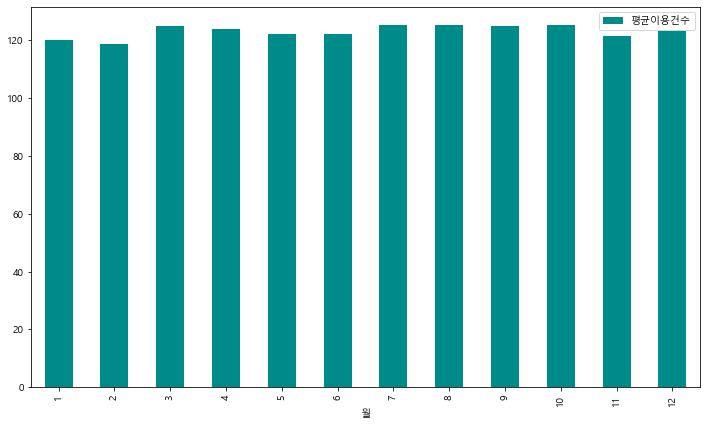

In [36]:
p = df.groupby(['월'])['이용건수'].mean()
df7 = p.to_frame()
df7.rename(columns={'이용건수': '평균이용건수'}, inplace=True)
df7.plot.bar(figsize=(12,7), color = 'darkcyan')

#### 17. 기준일자에 따른 성별 별 이용금액의 추이를 Lineplot으로 시각화 하시오.

In [37]:
df8 = df[['기준일자','성별','이용금액']]

In [38]:
df8.head(10)

,기준일자,성별,이용금액
0,2018-04-01,F,22000
1,2018-04-01,M,184000
2,2018-04-01,M,425000
3,2018-04-01,M,82000
4,2018-04-01,M,44000
5,2018-04-01,F,18000
6,2018-04-01,F,158000
7,2018-04-01,F,26000
8,2018-04-01,M,35000
9,2018-04-01,M,329000


In [39]:
df_time = pd.pivot_table(df8, index='기준일자', columns='성별', values='이용금액')
df_time

성별,F,M
기준일자,,
2018-04-01,2371153.48,2639368.89
2018-04-02,4966908.09,4903989.40
2018-04-03,2658446.88,2685152.62
2018-04-04,2738932.78,2794141.05
2018-04-05,2452146.69,2600358.80
...,...,...
2019-03-27,2810784.41,2904139.41
2019-03-28,2782048.59,2981863.54
2019-03-29,3121342.29,3352179.62


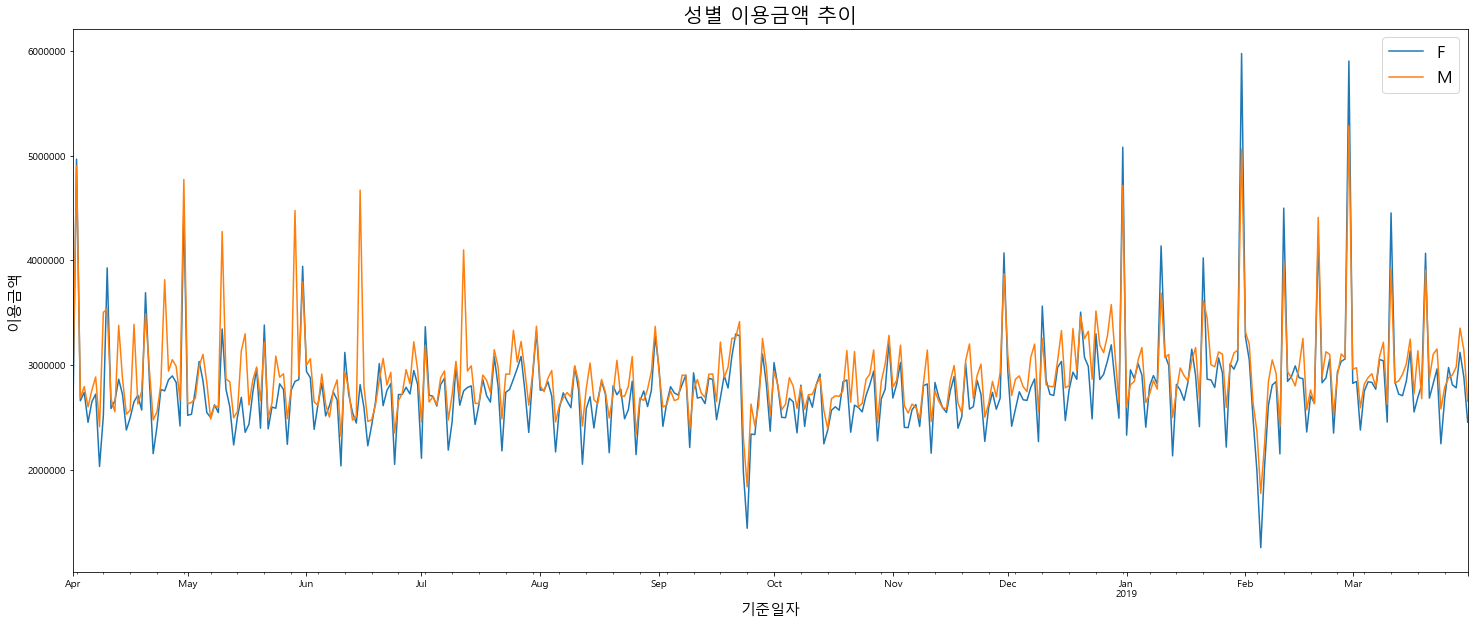

In [40]:
ax = df_time.plot(figsize=(25,10), legend=True)
plt.title('성별 이용금액 추이', fontsize=20)
plt.xlabel('기준일자', fontsize=15)
plt.ylabel('이용금액', fontsize=15)
plt.legend(fontsize=17)
plt.show()

#### 18. 요일에 따른 성별 별 이용금액을 Boxplot으로 시각화 하시오.

In [41]:
df9 = df[['요일','성별','이용금액']]

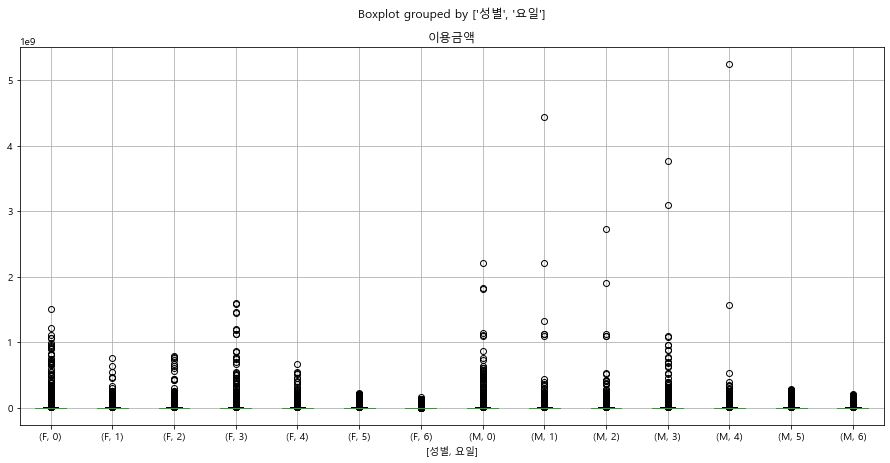

In [42]:
df9.boxplot(column='이용금액', by=['성별','요일'], figsize=(15,7))